# Combining Neural Network and K-Means Classification to create a DoA Index

In [1]:
'''
Import file into Python. Use the normal pandas and numpy package to
access DataFrame functionality.
'''

import pandas as pd
import numpy as np

file = "C:\\Users\\stanleytjandra.DESKTOP-OOIPU77\\OneDrive - USQ\\Data Science UniSQ\\2024 Trimester 3\\CSC6003 Machine Learning\\Assessments\\Assessment 3\\Projectdataset1.xlsx"

In [2]:
'''
Upload training data from Project 1. This is the worksheet with prefix
"Train-". Combine all training data into one DataFrame.
'''

train_data = {}    # Create a dictionary to import all data from worksheets

for i in range(1, 13):    # for loop to read excel file for training data
    worksheet = f'Train-{i}'
    train_data[worksheet] = pd.read_excel(file, sheet_name=worksheet)

train_combined = pd.concat(train_data.values())    # use pd.concat to combine training all data values

'''
Now separate feature values and target values for training data.
For the purpose of this project, X_train is the feature data and y_train
is the BIS data to be trained to the model.
'''

X_train = train_combined[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y_train = train_combined['BIS']

In [3]:
'''
The same thing is to be done with the testing data, as above.
Feature values and BIS values are also sepearated in two arrays.
The y_test will be compared against y_pred later on down towards
the end of the project.
'''

test_data = {}
for i in range(1, 6):
    worksheet = f'Test-{i}'
    test_data[worksheet] = pd.read_excel(file, sheet_name=worksheet)

test_combined = pd.concat(test_data.values())

X_test = test_combined[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y_test = test_combined['BIS']

In [4]:
'''
To ensure that value ranges are not too big, normalizing the data is crucial
to create consistent data. There are scalers such as MinMaxScaler and others,
however, after several tryouts, StandardScaler gives the most optimum result.
'''

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [5]:
'''
The feature values of the training and testing data will now be "standardized"
according to each column's statistics (mean and standard deviation). These
data values will be used for the model to predict the y_test.
'''

X_train = scaler.fit_transform(X_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']])
X_test = scaler.fit_transform(X_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']])

In [6]:
'''
Converting these data to a Pandas DataFrame is useful to reorganise
and rearrange data in future steps.
'''

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

X_train_df.head(20)

,0,1,2,3,4,5,6
0,0.933941,0.157499,1.339712,1.483579,1.516908,0.920758,-0.519788
1,1.019972,0.157451,0.851748,1.495120,1.595146,1.042389,-0.321157
2,0.984197,0.156974,-1.014282,1.490795,1.601891,1.068995,-0.518553
3,0.973838,0.142673,-0.340822,1.508120,1.603822,1.050658,-0.714408
4,1.002019,0.147299,1.429691,1.515798,1.651001,1.056129,-0.518263
5,1.046815,0.183936,1.155254,1.523115,1.592667,1.057982,-0.519788
6,0.996082,0.162993,0.715395,1.522227,1.620076,1.092005,-0.321157
7,1.052276,0.186344,-0.656441,1.514476,1.590821,1.098341,-0.387255
8,1.081863,0.178832,-1.268992,1.526073,1.464953,1.106091,-0.910889
9,1.044953,0.169179,-1.598108,1.521150,1.455014,1.074545,-0.715659


In [7]:
X_test_df.head(20)

,0,1,2,3,4,5,6
0,-0.409051,-1.801243,0.259015,2.561529,0.924649,-0.670964,-0.219679
1,-0.467910,-0.891823,1.486574,2.571958,0.932381,-0.641421,-0.462082
2,-0.522848,-0.345761,-0.059048,2.567959,0.933873,-0.636005,-0.642462
3,-0.524353,-0.030965,0.224368,2.585668,0.938527,-0.601347,0.200035
4,-0.537077,0.086378,1.369466,2.603328,0.945169,-0.578296,0.505861
5,-0.493478,0.033585,-0.721161,2.619540,0.958885,-0.550663,-0.340883
6,-0.499586,-0.027144,-1.416882,2.636963,0.966693,-0.532860,-0.581595
7,-0.507151,-0.061327,-0.477936,2.666571,0.971686,-0.524274,-0.522384
8,-0.485172,-0.016930,0.454080,2.679030,0.971570,-0.512997,0.020479
9,-0.460843,-0.063109,-1.397479,2.672275,0.979625,-0.499220,0.446105


In [8]:
# For ease and consistency, rename feature values x1 - x 7

X_train_df = X_train_df.rename(columns={0:"x1", 1:"x2", 2:"x3", 3:"x4", 4:"x5", 5:"x6", 6:"x7"})
X_test_df = X_test_df.rename(columns={0:"x1", 1:"x2", 2:"x3", 3:"x4", 4:"x5", 5:"x6", 6:"x7"})

#### Feature Selection

Now for this project, check what is the best number of 'k' features by
testing out manually. As there are are 7 features, the tests are from k=3
to k=6. It is quite interesting to see which features last until the end.
The next series of codes tests the best number of k.

In [9]:
'''
Feature selection: to select features, this model uses SelectKBest based
on the F-statistic of the data. This is the value of:
mean of variance of the group means (Mean Square Between) divided by the
mean of within group variances (Mean Squared Error)
Standardizing the values using f_regression is good for compute the
f-value betewen feature and target, and this is apt for a regression
problem in this part of the project.
SelectKBest will then filter out the features with the lowest F-values
and retain the highest F-values, as higher values indicate a stronger
relationship and effect towards the target values (y_train and y_test)
'''

from sklearn.feature_selection import SelectKBest, f_regression

In [10]:
k_best_selector6 = SelectKBest(score_func=f_regression, k=6)
train_feature_selection6 = k_best_selector6.fit_transform(X_train, y_train)
selected_features6 = k_best_selector6.get_support(indices=True)
print(f"6 Best features: {selected_features6}")

6 Best features: [0 1 3 4 5 6]


In [11]:
k_best_selector5 = SelectKBest(score_func=f_regression, k=5)
train_feature_selection5 = k_best_selector5.fit_transform(X_train, y_train)
selected_features5 = k_best_selector5.get_support(indices=True)
print(f"5 Best Features: {selected_features5}")

5 Best Features: [0 3 4 5 6]


In [12]:
k_best_selector4 = SelectKBest(score_func=f_regression, k=4)
train_feature_selection4 = k_best_selector4.fit_transform(X_train, y_train)
selected_features4 = k_best_selector4.get_support(indices=True)
print(f"4 Best Features: {selected_features4}")

4 Best Features: [0 3 4 6]


In [13]:
k_best_selector3 = SelectKBest(score_func=f_regression, k=3)
train_feature_selection3 = k_best_selector3.fit_transform(X_train, y_train)
selected_features3 = k_best_selector3.get_support(indices=True)
print(f"3 Best Features: {selected_features3}")

3 Best Features: [3 4 6]


The above results show these results:
0 = x1
1 = x2
2 = x3
3 = x4
4 = x5
5 = x6
6 = x7

To further test which k's are best, and see how much they fit best, we can move on to the next stage of the project. Testing the results using Neural Network.

### Supervised Machine Learning: Neural Networks

The supervised machine learning method used in this project is Neural Networks, to train the model and create a predicted BIS Index list as close as possible to the testing data. Neural Networks uses backpropagation which  first passes through a forward propragation to apply the activation function (in this case using 'ReLU' and its solver 'adam'). Then the rror calculation is calcualted by comparing predicted output with actual target using a loss function (Mean Squared Error, or RMSE). Then by backpropgation through the nodes, error is calcualted through the network.

To check which k is best to use to move forward, train the model using different numbers of k, and monitor the training loss due to error as a curve. Theoretically, the more the data is trained, the less the loss values. To monitor, the function mlp.loss_curve_ is used to easily see the loss curve created by the backpropagation error values. The least amount of loss is preferrable. (Pearson Correlation is also included as an extra statistic to monitor result.)

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [15]:
'''
A number of trials were attempted to find the best number of nodes. Some
combinations of nodes show very similar results. Having too many nodes may
result in overtraining, less nodes may result in undertraining. Hence, the
chosen number of layers is 5 (7 including the ends) and the nodes lists are
(64, 32, 16, 8, 4) to guide results to converge.
The activation function ReLU is used, while solver adam is used as they
are better to handle noise and create quick convergence.
'''

mlp = MLPRegressor(hidden_layer_sizes=(64,32,16,8,4),
                  activation = 'relu',
                  solver='adam',
                  alpha=0.0001,
                  learning_rate_init=0.001,
                  learning_rate = 'adaptive',
                  random_state = 10,    # to maintain repeatable results
                  max_iter=2000)

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


RMSE: 20.295102820480917
Pearson Correlation: PearsonRResult(statistic=nan, pvalue=nan)
Loss:  133.4383986508359


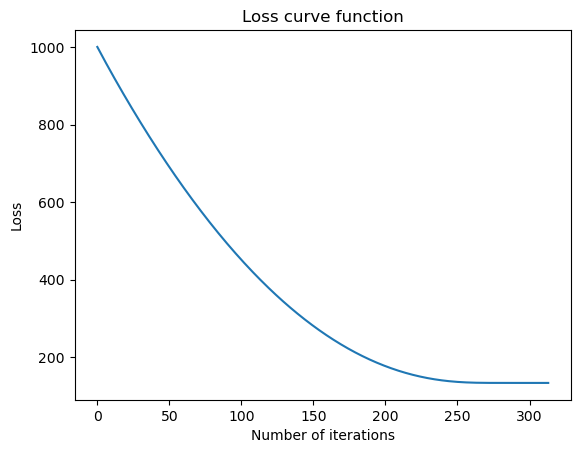

In [16]:
# Six best k-values from above

X_train_6 = X_train_df[["x1", "x2", "x4", "x5", "x6", "x7"]]
X_test_6 = X_test_df[["x1", "x2", "x4", "x5", "x6", "x7"]]

mlp.fit(X_train_6, y_train)    # 'Fit' data into the training model

y_pred6 = mlp.predict(X_test_6)    # Predict using the feature values of BIS Index
rmse = mean_squared_error(y_test, y_pred6, squared=False)    # Error calc
pcorr = pearsonr(y_test, y_pred6)    # Pearson Correlation to check correlation with test values
print(f'RMSE: {rmse}')
print(f'Pearson Correlation: {pcorr}')
print('Loss: ',mlp.loss_)    # Loss value from last iteration

plt.plot(mlp.loss_curve_)
plt.title("Loss curve function")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()


RMSE: 10.741832542855388
Pearson Correlation: PearsonRResult(statistic=0.8531152377908234, pvalue=0.0)
Loss:  12.408458980015777


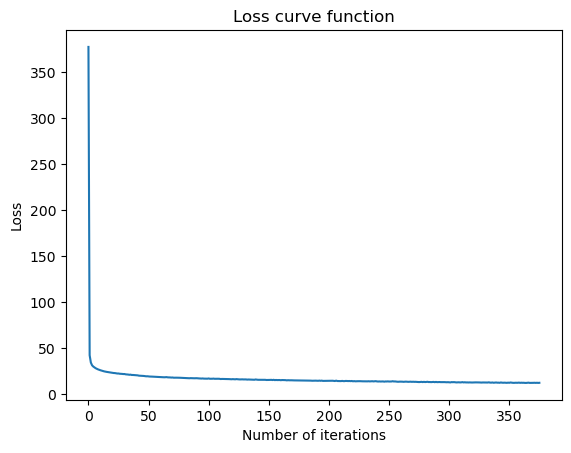

In [17]:
# Five best k-values from above

X_train_5 = X_train_df[["x1", "x4", "x5", "x6", "x7"]]
X_test_5 = X_test_df[["x1", "x4", "x5", "x6", "x7"]]

mlp.fit(X_train_5, y_train)    # 'Fit' data into the training model

y_pred5 = mlp.predict(X_test_5)    # Predict using the feature values of BIS Index
rmse = mean_squared_error(y_test, y_pred5, squared=False)    # Error calc
pcorr = pearsonr(y_test, y_pred5)    # Pearson Correlation to check correlation with test values
print(f'RMSE: {rmse}')
print(f'Pearson Correlation: {pcorr}')
print('Loss: ',mlp.loss_)    # Loss value from last iteration

plt.plot(mlp.loss_curve_)
plt.title("Loss curve function")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()


RMSE: 10.191308699909843
Pearson Correlation: PearsonRResult(statistic=0.8719156415848724, pvalue=0.0)
Loss:  18.39887047205238


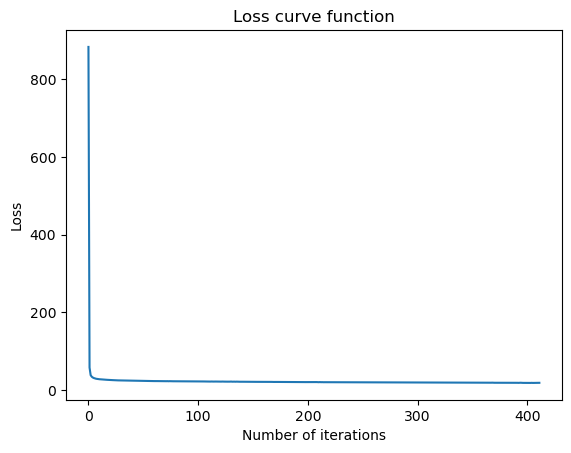

In [18]:
# Four best k-values from above

X_train_4 = X_train_df[["x1", "x4", "x5", "x7"]]
X_test_4 = X_test_df[["x1", "x4", "x5", "x7"]]

mlp.fit(X_train_4, y_train)    # 'Fit' data into the training model

y_pred4 = mlp.predict(X_test_4)    # Predict using the feature values of BIS Index
rmse = mean_squared_error(y_test, y_pred4, squared=False)    # Error calc
pcorr = pearsonr(y_test, y_pred4)    # Pearson Correlation to check correlation with test values
print(f'RMSE: {rmse}')
print(f'Pearson Correlation: {pcorr}')
print('Loss: ',mlp.loss_)    # Loss value from last iteration

plt.plot(mlp.loss_curve_)
plt.title("Loss curve function")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()


RMSE: 10.708897173350941
Pearson Correlation: PearsonRResult(statistic=0.8598349351732175, pvalue=0.0)
Loss:  29.130464292377688


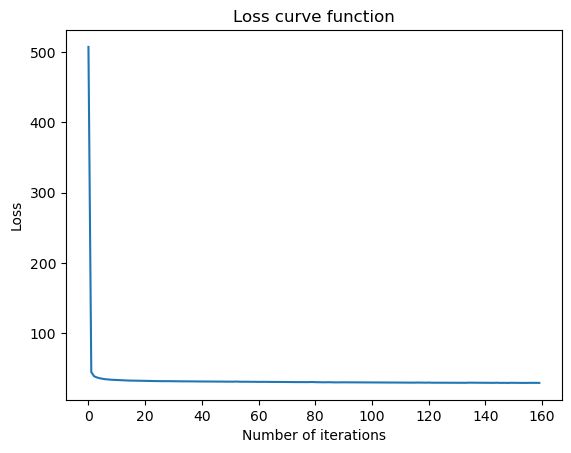

In [19]:
# Three best k-values from above

X_train_3 = X_train_df[["x4", "x5", "x7"]]
X_test_3 = X_test_df[["x4", "x5", "x7"]]

mlp.fit(X_train_3, y_train)    # 'Fit' data into the training model

y_pred3 = mlp.predict(X_test_3)    # Predict using the feature values of BIS Index
rmse = mean_squared_error(y_test, y_pred3, squared=False)    # Error calc
pcorr = pearsonr(y_test, y_pred3)    # Pearson Correlation to check correlation with test values
print(f'RMSE: {rmse}')
print(f'Pearson Correlation: {pcorr}')
print('Loss: ',mlp.loss_)    # Loss value from last iteration

plt.plot(mlp.loss_curve_)
plt.title("Loss curve function")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()


From the results, the y-value (BIS Index) prediction from k=5 is chosen, that isy_pred5. This is because ther result combines the low value of loss and RMSE, while maintaining a high Pearson Correlation Coeffient. k=6 may result in overfitting, and k=3 could result in underfitting (and the loss values are too big). Hence, the project will proceed forward with y_pred5 to be compared with y_test (original test data).

### Unsupervised Machine Learning: K-Means with Two Clusters

The next step is to be able to classify whether each y_pred5 BIS index is either of the two outcomes: Deep Anaesthetic or Awake. Higher BIS Index indicates Awake and lower BIS Index indicates Deep Anaesthetic. The KMeans package would be able to classify the data quite succinctly.

To complete this step, first create a DataFrame to fit the y_pred5 values with the 5 features of the train dataset. So the features of the DataFrame named 'test_data_5' are: 'y_pred5', 'x1', 'x4', 'x5', 'x6', 'x7', as decided by the SelectKBest and Supervised Machine Learning result above.

Then create another DataFrame to fit the y_test values with the 5 features of the train dataset. The same features are used, and the the dataframe is titled: true_data_5.

In [20]:
from sklearn.cluster import KMeans

In [21]:
'''
The feature values used here will be the true test data from the 'Test-#'
worksheet, titled X_test_5, created above.
'''

X_test_5.head(20)

,x1,x4,x5,x6,x7
0,-0.409051,2.561529,0.924649,-0.670964,-0.219679
1,-0.467910,2.571958,0.932381,-0.641421,-0.462082
2,-0.522848,2.567959,0.933873,-0.636005,-0.642462
3,-0.524353,2.585668,0.938527,-0.601347,0.200035
4,-0.537077,2.603328,0.945169,-0.578296,0.505861
5,-0.493478,2.619540,0.958885,-0.550663,-0.340883
6,-0.499586,2.636963,0.966693,-0.532860,-0.581595
7,-0.507151,2.666571,0.971686,-0.524274,-0.522384
8,-0.485172,2.679030,0.971570,-0.512997,0.020479
9,-0.460843,2.672275,0.979625,-0.499220,0.446105


In [22]:
# The following code revolves around creating the DataFrame: test_data_5

y_pred5_df = pd.DataFrame(y_pred5)    # Columnify a DataFrame
y_pred5_df = y_pred5_df.rename(columns={0:"y_pred5"})   # Rename feature

test_data_5 = pd.concat([y_pred5_df, X_test_5], axis=1)    # Join with the test_data given
test_data_5

,y_pred5,x1,x4,x5,x6,x7
0,83.810036,-0.409051,2.561529,0.924649,-0.670964,-0.219679
1,81.718704,-0.467910,2.571958,0.932381,-0.641421,-0.462082
2,82.976408,-0.522848,2.567959,0.933873,-0.636005,-0.642462
3,74.737002,-0.524353,2.585668,0.938527,-0.601347,0.200035
4,71.648771,-0.537077,2.603328,0.945169,-0.578296,0.505861
...,...,...,...,...,...,...
13745,48.404172,1.596193,-0.496482,0.134766,2.014984,-0.762828
13746,46.253540,1.606538,-0.494598,0.361856,1.999879,-0.942391
13747,46.411435,1.613392,-0.491487,0.409144,1.997372,-0.402584
13748,45.973219,1.572927,-0.488032,0.397768,1.990461,-0.400647


In [23]:
'''
Using KMeans fit_predict, we map two clusters titled A or B.
The clusters could be titled 'A' or 'B' without knowing whether they are
Deep Anaesthetic or Awake. However, we can see from the first true data
that the BIS Index is high so the first value should be Awake.
'''

features = test_data_5[["x1", "x4", "x5", "x6", "x7"]]

kmeans = KMeans(n_clusters=2)

# Create a classification column titled "Cluster" which is filled with
# 'A' or 'B' depending on the classification.

test_data_5["Cluster"] = kmeans.fit_predict(features)
test_data_5["Cluster"] = test_data_5['Cluster'].map({0: 'A', 1: 'B'})
test_data_5[['y_pred5', 'Cluster']].head(20)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,y_pred5,Cluster
0,83.810036,A
1,81.718704,A
2,82.976408,A
3,74.737002,A
4,71.648771,A
5,83.577150,A
6,86.180642,A
7,86.503381,A
8,81.436515,A
9,75.103794,A


In [24]:
'''
The same process we apply to create a DataFrame for the true test data,
titled 'true_data_5'. The same features x1, x4, x5, x6, x7 are used.
The BIS Index used here is y_test values.
'''

y_test_df = pd.DataFrame(y_test)
y_test_df = y_test_df.rename(columns={"BIS":"y_test5"})
y_test_df

,y_test5
0,97.7
1,97.7
2,97.7
3,97.7
4,97.7
...,...
1893,64.4
1894,64.8
1895,64.9
1896,65.1


In [25]:
'''
One problem occurred where the index no. are duplicated, hence I needed to
re-index the values the true BIS values. This needs to be done or else it
cannot fit with the feature values x1, x4, x5, x6, x7 from the test data.
'''

y_test_df = y_test_df.reset_index(drop=True)
y_test_df.index = range(len(y_test_df))
y_test_df

,y_test5
0,97.7
1,97.7
2,97.7
3,97.7
4,97.7
...,...
13745,64.4
13746,64.8
13747,64.9
13748,65.1


In [26]:
true_data_5 = pd.concat([y_test_df, X_test_5], axis=1)
true_data_5

,y_test5,x1,x4,x5,x6,x7
0,97.7,-0.409051,2.561529,0.924649,-0.670964,-0.219679
1,97.7,-0.467910,2.571958,0.932381,-0.641421,-0.462082
2,97.7,-0.522848,2.567959,0.933873,-0.636005,-0.642462
3,97.7,-0.524353,2.585668,0.938527,-0.601347,0.200035
4,97.7,-0.537077,2.603328,0.945169,-0.578296,0.505861
...,...,...,...,...,...,...
13745,64.4,1.596193,-0.496482,0.134766,2.014984,-0.762828
13746,64.8,1.606538,-0.494598,0.361856,1.999879,-0.942391
13747,64.9,1.613392,-0.491487,0.409144,1.997372,-0.402584
13748,65.1,1.572927,-0.488032,0.397768,1.990461,-0.400647


In [30]:
features_true = true_data_5[["x1", "x4", "x5", "x6", "x7"]]

kmeans = KMeans(n_clusters=2)

# Again, classify using trained data X_test_5, whether the y_test5 values
# will be 'A' or 'B' on a column titled Cluster_True

true_data_5["Cluster_True"] = kmeans.fit_predict(features_true)
true_data_5["Cluster_True"] = true_data_5['Cluster_True'].map({0: 'A', 1: 'B'})
true_data_5[['y_test5', 'Cluster_True']].head(20)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,y_test5,Cluster_True
0,97.7,A
1,97.7,A
2,97.7,A
3,97.7,A
4,97.7,A
5,97.6,A
6,97.5,A
7,97.5,A
8,97.4,A
9,97.4,A


In KMeans, the classification letters change, where group 0 can be classified as 'B' while group 1 is classified as 'A'. Sometimes this happens in KMeans algorithms, hence the need to understand the data.

In [31]:
'''
To check how many A's and B's are in each test_data_5 and true_data_5,
one can use a value_counts() function of pandas.
'''

counttestA = test_data_5['Cluster'].value_counts().get('A',0)
counttestB = test_data_5['Cluster'].value_counts().get('B',0)

counttrueA = true_data_5['Cluster_True'].value_counts().get('A',0)
counttrueB = true_data_5['Cluster_True'].value_counts().get('B',0)

print(f'Count of A in Prediction Data: {counttestA}')
print(f'Count of A in True Data: {counttrueA}')
print(f'Count of B in Prediction Data: {counttestB}')
print(f'Count of B in True Data: {counttrueB}')

Count of A in Prediction Data: 8507
Count of A in True Data: 8508
Count of B in Prediction Data: 5243
Count of B in True Data: 5242


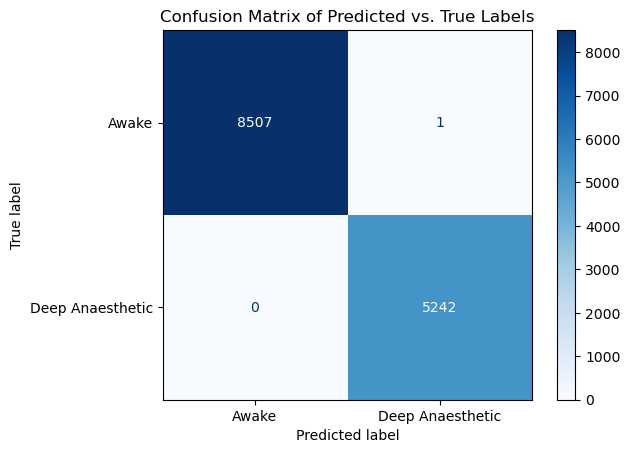

In [35]:
'''
As seen above, there is naught or only very little difference between
y_pred5 and the BIS values from the 'Test-' data. The model has been able
to predict the BIS index very well. Hence, the predicted BIS index values
predicted by the model should be able to match the actual true data.

To add a little bit more interesting display using a Confusion Matrix, the
code below creates a visualization of between predicted and true labels.
'''

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true_labels = true_data_5['Cluster_True']
pred_labels = test_data_5['Cluster']

cm = confusion_matrix(true_labels, pred_labels, labels=['A','B'])

# Checking below: 'A' matches 'Awake', while 'B' matches 'Deep anaesthetic'

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Awake','Deep Anaesthetic'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of Predicted vs. True Labels")
plt.show()

In [37]:
# Finally, checking with the metrics the accuracy, precision and recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, pos_label='A')
recall = recall_score(true_labels, pred_labels, pos_label='A')

print(f"Accuracy of the model: {accuracy}")
print(f"Precision of the model: {precision}")
print(f"Recall of the model: {recall}")

Accuracy of the model: 0.9999272727272728
Precision of the model: 1.0
Recall of the model: 0.9998824635637047
